<a href="https://colab.research.google.com/github/bhushanp9/ML-Projects/blob/main/Naive_Bays_5pm_using_Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report ,accuracy_score

In [8]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=16)

In [14]:
model1 = GaussianNB()

In [15]:
#train
model1.fit(x_train,y_train)

GaussianNB()

In [16]:

y_pred =  model1.predict(x_test)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       102
           1       0.78      0.67      0.72        52

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



In [18]:
#-----------------------------------------------------------------------------------------
s = []
for i in range(0,101):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=i)
  model1 = GaussianNB()
  model1.fit(x_train,y_train)
  y_pred = model1.predict(x_test)
  print(f'For random_state : {i}, the accuracy in : {accuracy_score(y_test,y_pred)}')
  s.append(accuracy_score(y_test,y_pred))




For random_state : 0, the accuracy in : 0.7922077922077922
For random_state : 1, the accuracy in : 0.7727272727272727
For random_state : 2, the accuracy in : 0.7597402597402597
For random_state : 3, the accuracy in : 0.7142857142857143
For random_state : 4, the accuracy in : 0.7597402597402597
For random_state : 5, the accuracy in : 0.7662337662337663
For random_state : 6, the accuracy in : 0.7922077922077922
For random_state : 7, the accuracy in : 0.7532467532467533
For random_state : 8, the accuracy in : 0.7727272727272727
For random_state : 9, the accuracy in : 0.7597402597402597
For random_state : 10, the accuracy in : 0.7142857142857143
For random_state : 11, the accuracy in : 0.7402597402597403
For random_state : 12, the accuracy in : 0.7922077922077922
For random_state : 13, the accuracy in : 0.7467532467532467
For random_state : 14, the accuracy in : 0.7597402597402597
For random_state : 15, the accuracy in : 0.7207792207792207
For random_state : 16, the accuracy in : 0.8246753

In [19]:
#0.8246753246753247 ---- 16 wala
#0.8246753246753247
max(s)

0.8246753246753247

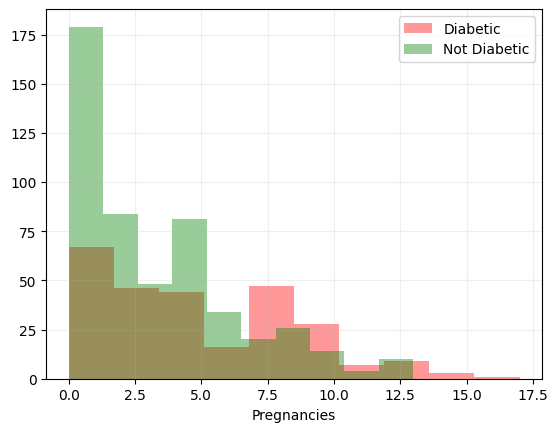

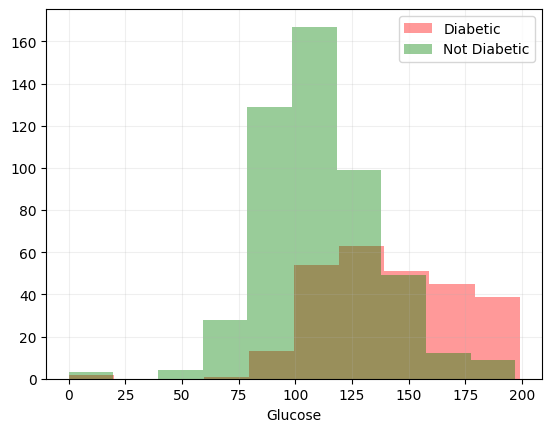

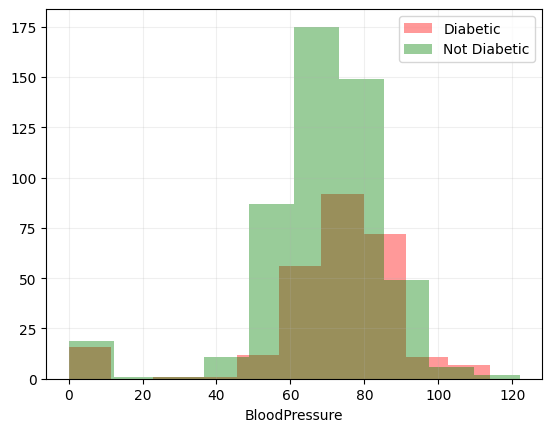

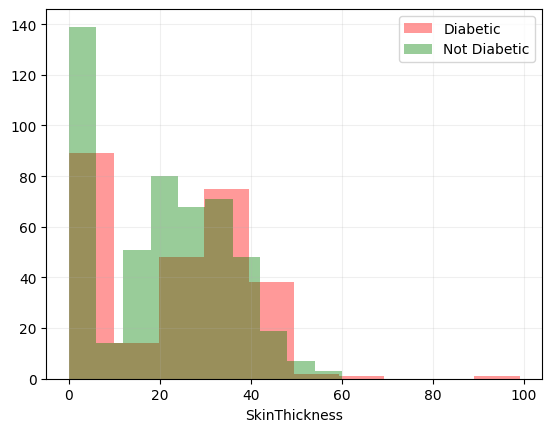

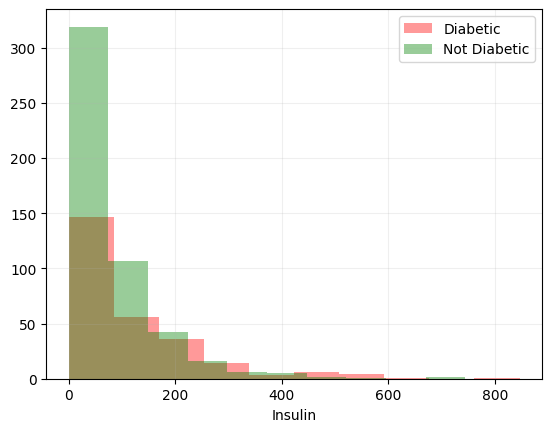

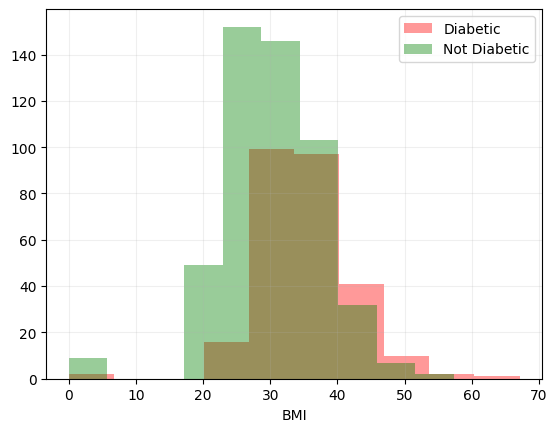

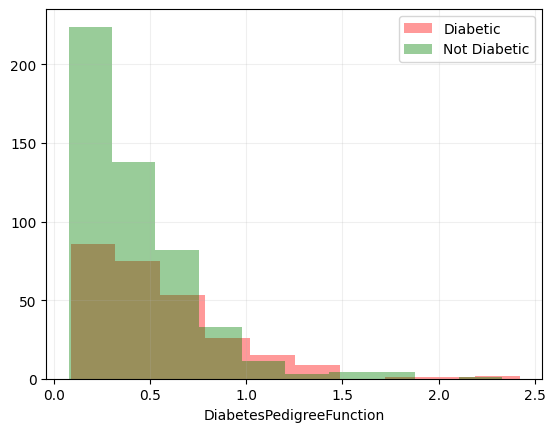

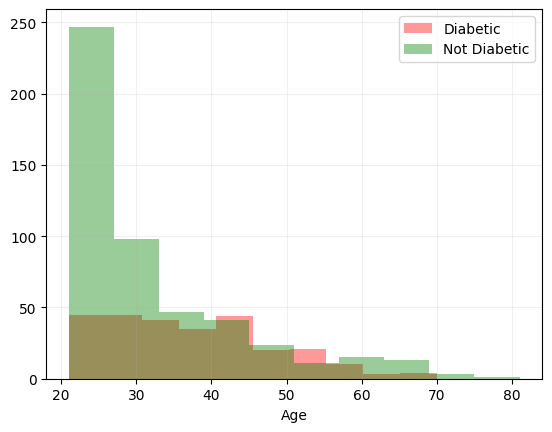

In [20]:
#EDA

for col in df.columns[:-1]:
  plt.hist(df[df['Outcome']==1][col],alpha = 0.4,color = 'red',label = "Diabetic")
  plt.hist(df[df['Outcome']==0][col],alpha = 0.4,color = 'green',label = "Not Diabetic")
  plt.legend()
  plt.grid(alpha = 0.2)
  plt.xlabel(col)
  plt.show()